In [6]:
import os
import datetime
import pandas as pd
import numpy as np
from lxml import etree
from tqdm import tqdm

In [7]:
# The base_path should be the results with labels generated in ../data_preparations/add_labels.py
base_path = r"../../../data/content_with_labels"
columns = ["instruction","input","output"]
instruction = "What is the sentiment of this news? Answer:{very negative/negative/neutral/positive/very positive}"

file_list = os.listdir(base_path)
print(instruction)

What is the sentiment of this news? Answer:{very negative/negative/neutral/positive/very positive}


python3.10 -m pip install jupyter### Title/标题

In [8]:
dataset = pd.DataFrame(columns= columns)
for file_name in tqdm(file_list):
    df = pd.read_csv(os.path.join(base_path, file_name))
    df["input"] = df.apply(lambda x: f'今天的日期为：{x["publish_date"]}。\n新闻标题为：\"{x["post_title"]}\"。', axis = 1)
    df["instruction"] = instruction
    df['output'] = df["label"]
    tmp = df[columns+["date"]]
    dataset = pd.concat([dataset, tmp])

100%|██████████| 1/1 [00:00<00:00, 75.35it/s]


In [9]:
dataset

,instruction,input,output,date
0,What is the sentiment of this news? Answer:{ve...,"今天的日期为：2023-08-07。\n新闻标题为：""万科Ａ：融资净偿还3241.85万元，...",negative,2023-08-07
1,What is the sentiment of this news? Answer:{ve...,"今天的日期为：2023-08-07。\n新闻标题为：""万科A本周融资净偿还4339.37万元...",negative,2023-08-06
2,What is the sentiment of this news? Answer:{ve...,"今天的日期为：2023-08-06。\n新闻标题为：""万科A本周深股通持股市值减少1.41亿...",negative,2023-08-06
3,What is the sentiment of this news? Answer:{ve...,"今天的日期为：2023-08-05。\n新闻标题为：""万科A08月04日被深股通减持1331...",negative,2023-08-05
4,What is the sentiment of this news? Answer:{ve...,"今天的日期为：2023-08-04。\n新闻标题为：""万科Ａ：连续3日融资净买入累计4951...",negative,2023-08-04
5,What is the sentiment of this news? Answer:{ve...,"今天的日期为：2023-08-04。\n新闻标题为：""万科A08月03日获深股通增持597....",negative,2023-08-04
6,What is the sentiment of this news? Answer:{ve...,"今天的日期为：2023-08-04。\n新闻标题为：""万科前7个月销售约2260亿元 近期新...",negative,2023-08-04
7,What is the sentiment of this news? Answer:{ve...,"今天的日期为：2023-08-04。\n新闻标题为：""万科A披露7月销售数据 实现合同销售金...",negative,2023-08-03


In [10]:
dataset = dataset[dataset.output != "No data"]

In [47]:
dataset.date.sort_values().unique()

array(['2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06',
       '2023-08-07'], dtype=object)

<Axes: xlabel='date'>

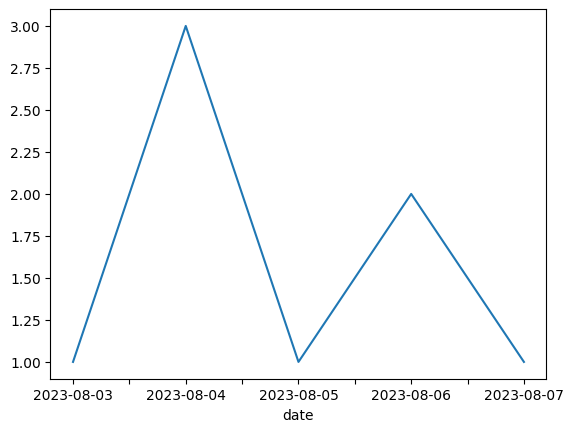

In [48]:
dataset.groupby("date").date.count().plot()

#####  Test from 2023-10-01 till 2023-03-31
#####  Train & valid from 2011-05-12 till 2022-03-31

In [49]:
dataset[dataset.date<"2023-10-01"].shape

(8, 4)

In [50]:
dataset.shape

(8, 4)

In [51]:
print(df["input"][0])

今天的日期为：2023-08-07。
新闻内容为：" 来源：东方财富Choice数据 作者：财智星 万科Ａ融资融券信息显示，2023年8月4日融资净偿还3241.85万元；融资余额44.34亿元，较前一日下降0.73%。融资方面，当日融资买入2.1亿元，融资偿还2.43亿元，融资净偿还3241.85万元。融券方面，融券卖出19.18万股，融券偿还30.81万股，融券余量864.41万股，融券余额1.32亿元。融资融券余额合计45.66亿元。万科Ａ融资融券交易明细（08-04）万科Ａ历史融资融券数据一览免责声明：本文基于大数据生产，仅供参考，不构成任何投资建议，据此操作风险自担。（文章来源：东方财富Choice数据） [点击查看原文]"。


In [52]:
# Train & valid
train_valid = dataset[dataset.date < "2023-10-01"][columns]
train_valid.to_csv(r"../../../data/contents/dataset_title_train_and_valid.csv", index = False)

In [53]:
# Test
test = dataset[dataset.date >= "2023-10-01"][columns]
test.to_csv("../../../data/contents/dataset_title_test.csv", index = False)

In [54]:
data_list = []
for item in train_valid.itertuples():
    tmp = {}
    tmp["instruction"] = item.instruction
    tmp["input"] = item.input
    tmp["output"] = item.output
    data_list.append(tmp)

In [55]:
# To Json
import json
with open("../../../data/contents/dataset_title_train_and_valid.json", "w+", encoding='utf-8') as f:
    json.dump(data_list, f, ensure_ascii= False)

In [56]:
# To Json
import json
with open("../../../data/contents/dataset_title_test.json", "w+", encoding='utf-8') as f:
    json.dump(data_list, f, ensure_ascii= False)

### Contetn/内容

In [57]:
def get_content(x):
    try:
        tree = etree.HTML(x)
        content = tree.xpath("//*[name(.)!='style']/text()")
        content = "".join(content)
        content = content.replace("\u3000", '')
        return content
    except:
        return np.nan

In [58]:
dataset_content = pd.DataFrame(columns= columns)
for file_name in tqdm(file_list):
    df = pd.read_csv(os.path.join(base_path, file_name))  
    df['input'] = df['post_content'].apply(get_content)
    df = df.dropna(subset=['input'])
    df["input"] = df.apply(lambda x: f'今天的日期为：{x["publish_date"]}。\n新闻内容为：\"{x["input"]}\"。', axis = 1)
    df["instruction"] = instruction
    df['output'] = df["label"]
    tmp = df[columns+["date"]]
    dataset_content = pd.concat([dataset_content, tmp])

100%|██████████| 1/1 [00:00<00:00, 126.63it/s]


In [59]:
print(df["input"][0])

今天的日期为：2023-08-07。
新闻内容为：" 来源：东方财富Choice数据 作者：财智星 万科Ａ融资融券信息显示，2023年8月4日融资净偿还3241.85万元；融资余额44.34亿元，较前一日下降0.73%。融资方面，当日融资买入2.1亿元，融资偿还2.43亿元，融资净偿还3241.85万元。融券方面，融券卖出19.18万股，融券偿还30.81万股，融券余量864.41万股，融券余额1.32亿元。融资融券余额合计45.66亿元。万科Ａ融资融券交易明细（08-04）万科Ａ历史融资融券数据一览免责声明：本文基于大数据生产，仅供参考，不构成任何投资建议，据此操作风险自担。（文章来源：东方财富Choice数据） [点击查看原文]"。


In [60]:
dataset_content = dataset_content[dataset_content.output != "No data"]
dataset_content.shape

(8, 4)

In [61]:
dataset_content["total_len"] = dataset_content["input"].apply(lambda x:len(x.split(" ")))
dataset_content = dataset_content[dataset_content["total_len"] < 1000]
dataset_content.shape

(8, 5)

In [62]:
dataset_content["total_len"].max()

9

In [63]:
# Train & valid
train_valid = dataset_content[dataset_content.date < "2023-10-01"][columns]
train_valid.to_csv("../../../data/contents/dataset_content_train_and_valid.csv", index = False)

In [64]:
# Test
test = dataset_content[dataset_content.date >= "2023-10-01"][columns]
test.to_csv("../../../data/contents/dataset_content_test.csv", index = False)

In [65]:
data_list = []
for item in train_valid.itertuples():
    tmp = {}
    tmp["instruction"] = item.instruction
    tmp["input"] = item.input
    tmp["output"] = item.output
    data_list.append(tmp)

In [66]:
import json
with open("../../../data/contents/dataset_content_train_and_valid.json", "w+", encoding='utf-8') as f:
    json.dump(data_list, f, ensure_ascii= False)

In [67]:
dataset_content[dataset_content.date < "2023-10-01"].groupby("output").count()

,instruction,input,date,total_len
output,,,,
negative,8,8,8,8


<Axes: >

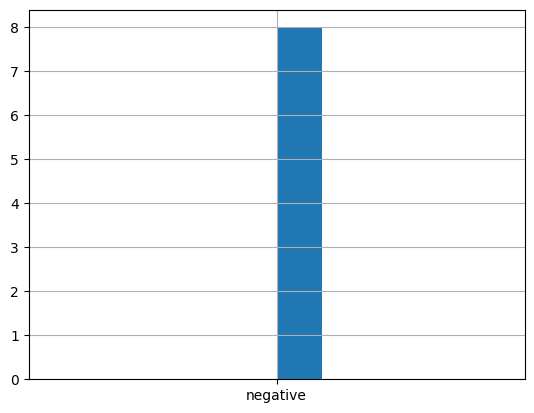

In [68]:
dataset_content[dataset_content.date < "2023-10-01"].output.hist()